In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurações visuais
sns.set(style="whitegrid")
%matplotlib inline

# Caminho relativo para chegar na pasta data/raw
DATA_PATH = "../data/raw/creditcard.csv"


if os.path.exists(DATA_PATH):
    print(f"Arquivo encontrado em: {DATA_PATH}")
else:
    print(f"ERRO: Arquivo não encontrado em {DATA_PATH}. Verifique se moveu o csv.")

Arquivo encontrado em: ../data/raw/creditcard.csv


In [3]:

df = pd.read_csv(DATA_PATH)

# Visão geral
print("Shape do Dataset:", df.shape)
print("\nInformações dos Tipos de Dados:")
print(df.info())

# Checando valores nulos
print("\nValores Nulos por Coluna:")
print(df.isnull().sum().max()) 

Shape do Dataset: (284807, 31)

Informações dos Tipos de Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-nul

Distribuição das Classes:
Class
0    284315
1       492
Name: count, dtype: int64

Porcentagem de Fraudes: 0.173%


/var/folders/bc/3fck38_57j918mwlyxrxlxnh0000gn/T/ipykernel_43193/2288080313.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort=True)


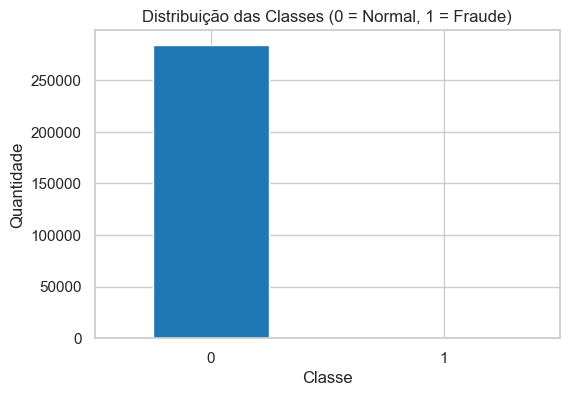

In [4]:

count_classes = pd.value_counts(df['Class'], sort=True)

print("Distribuição das Classes:")
print(count_classes)
print(f"\nPorcentagem de Fraudes: {df['Class'].value_counts(normalize=True)[1]*100:.3f}%")

# Gráfico
plt.figure(figsize=(6,4))
count_classes.plot(kind='bar', rot=0, color=['#1f77b4', '#ff7f0e'])
plt.title("Distribuição das Classes (0 = Normal, 1 = Fraude)")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.show()

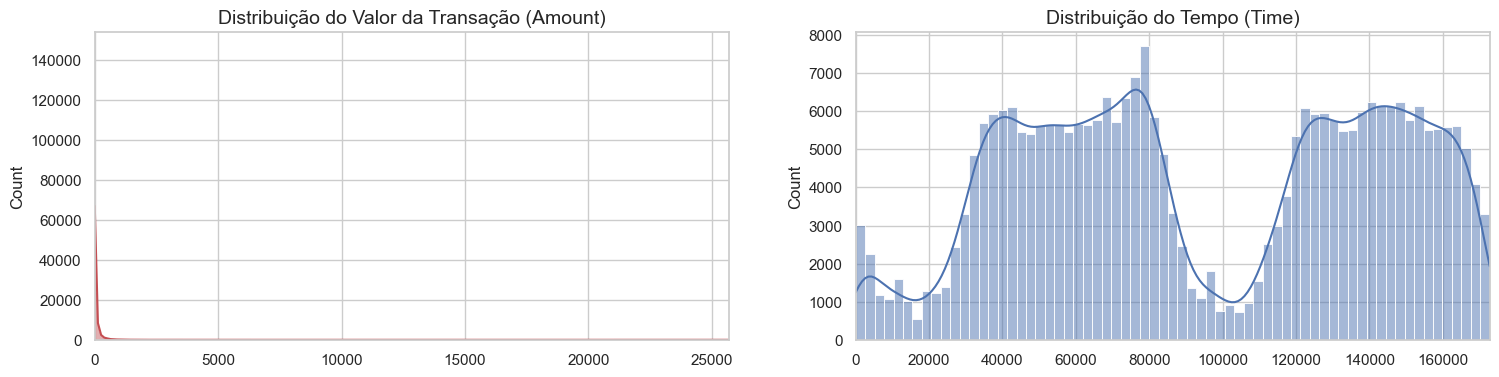

In [5]:

fig, ax = plt.subplots(1, 2, figsize=(18,4))

# Histograma do valor das transações
amount_val = df['Amount'].values
sns.histplot(amount_val, ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribuição do Valor da Transação (Amount)', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Histograma do tempo
time_val = df['Time'].values
sns.histplot(time_val, ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribuição do Tempo (Time)', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

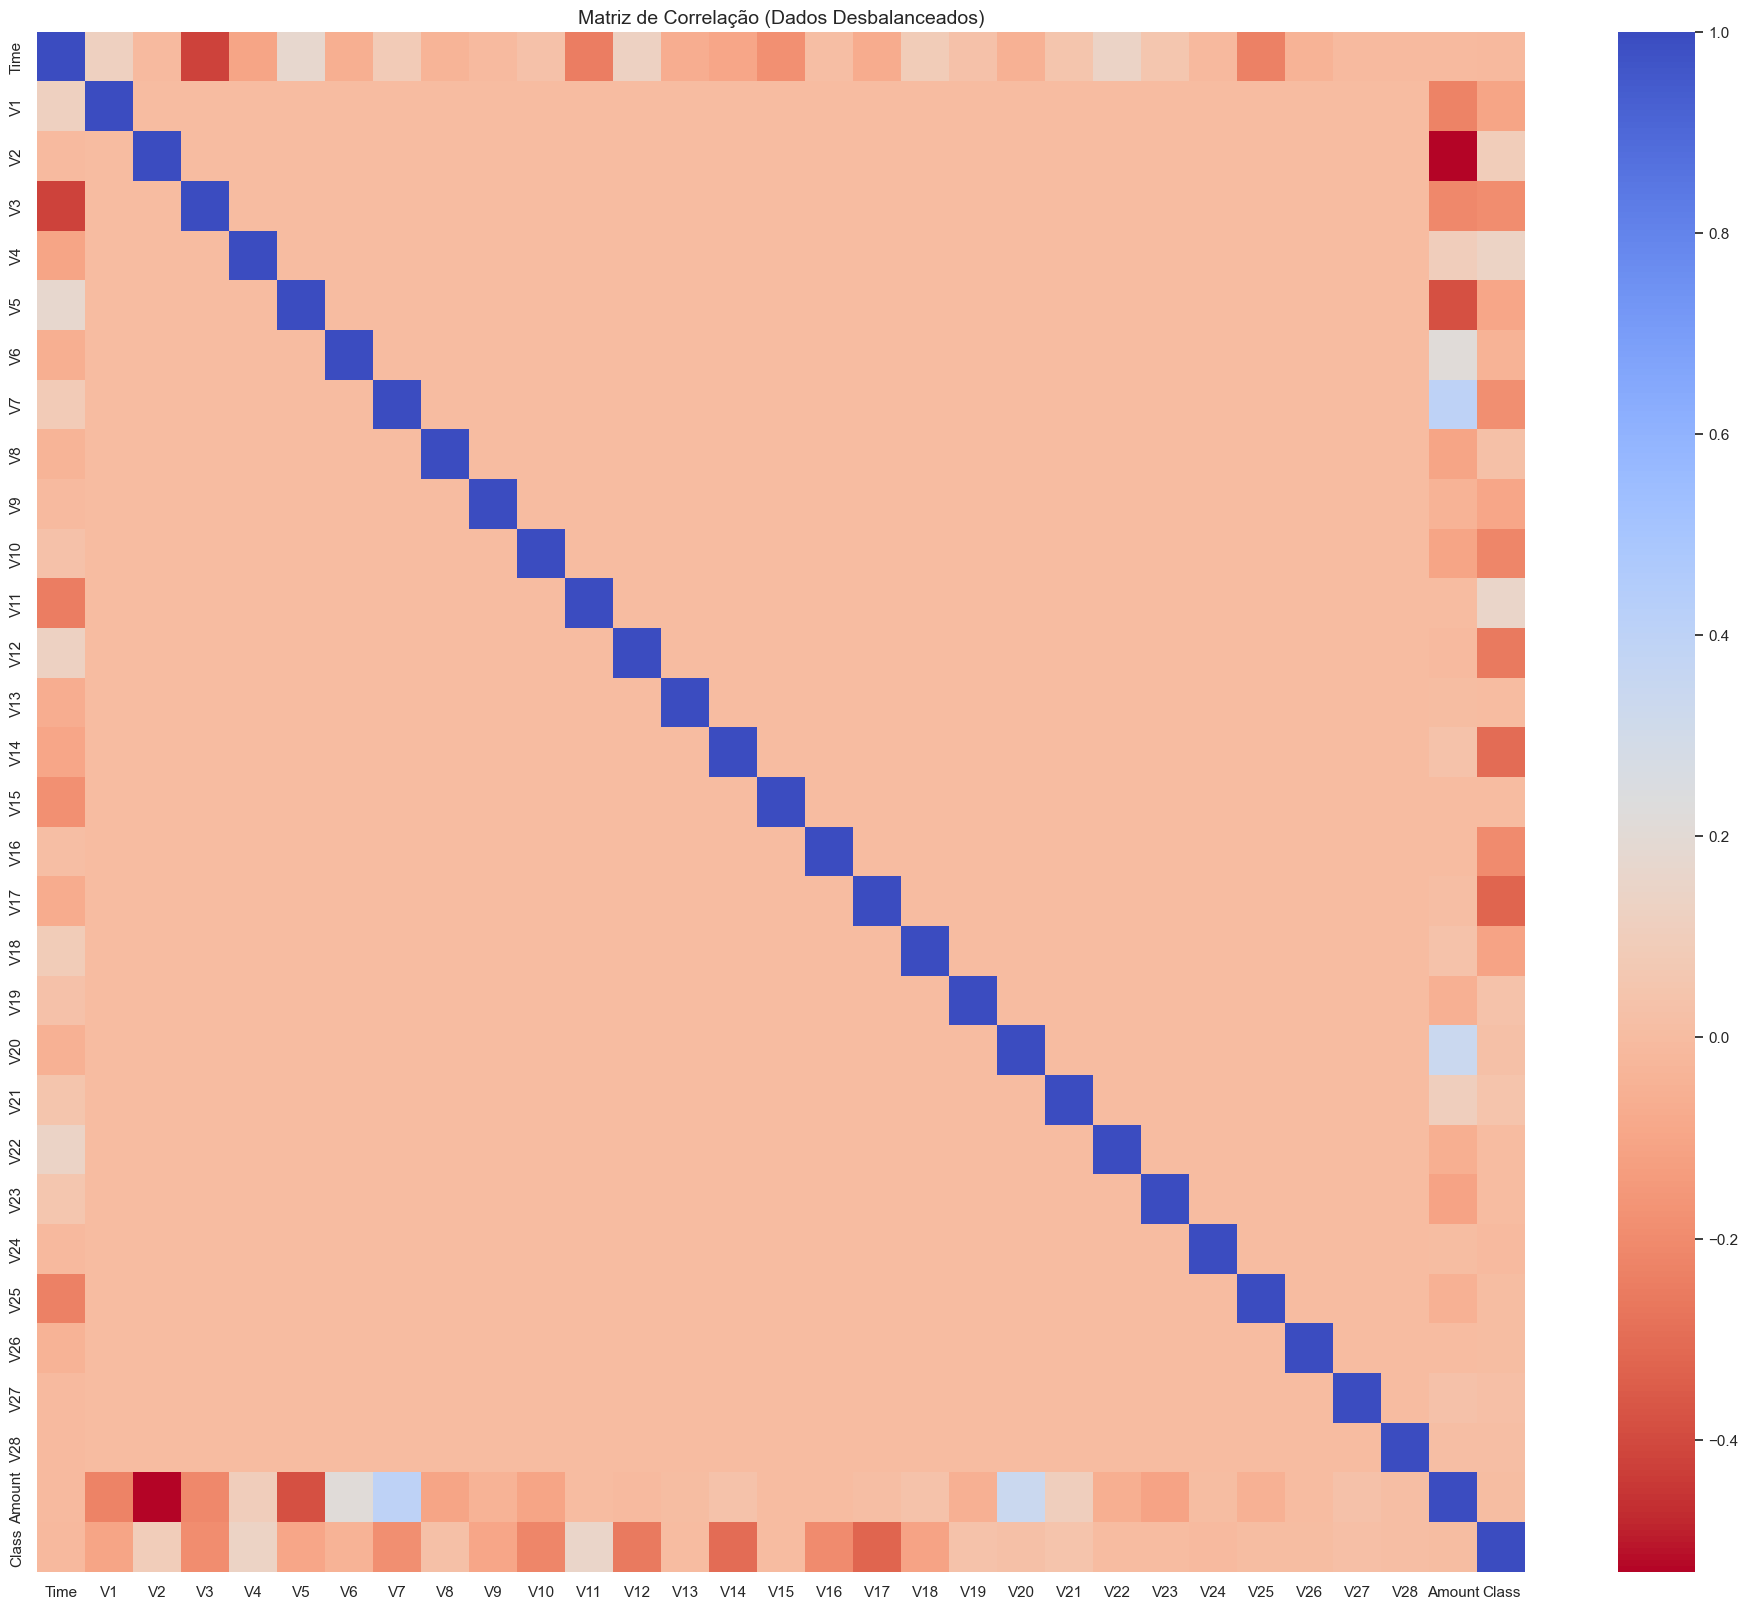

In [6]:
corr = df.corr()

plt.figure(figsize=(24,20))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("Matriz de Correlação (Dados Desbalanceados)", fontsize=14)
plt.show()